In [30]:
#If opening in colab run this cell
!git clone https://github.com/RubingLi123/foster_2023spring.git
%cd foster_2023spring/Homeworks

Cloning into 'foster_2023spring'...
remote: Enumerating objects: 435, done.
remote: Counting objects: 100% (333/333), done.
remote: Compressing objects: 100% (243/243), done.
remote: Total 435 (delta 129), reused 234 (delta 72), pack-reused 102
Receiving objects: 100% (435/435), 58.97 MiB | 12.81 MiB/s, done.
Resolving deltas: 100% (169/169), done.
Updating files: 100% (70/70), done.
/content/foster_2023spring/Homeworks/foster_2023spring/Homeworks


# IF OPENING IN COLAB, REMEMBER TO SAVE THIS NOTEBOOK TO GOOGLE DRIVE!

# Predicting Churn

After discussing the churn problem at TelCo with Henrietta for a while (remember, from your pre-class assignment?), you've finally defined an adequate target variable for churn and gathered relevant data to predict it. Moreover, the marketing department has come up with an amazing retention offer: the offer is guaranteed to convince customers to extend their contract for an extra year after receiving it. Unfortunately, the offer is quite expensive; it costs $200. You've been authorized to give the retention offer to up to 25% of the customers whose contracts are expiring. 

It is your job to use data from previous contract expirations to build a churn predictive model and make a recommendation of whom to target with the offers. You have assembled the best historical data set you can at this point, which includes:

- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- Churn: Whether the customer churned or not shortly after contract expiration (Yes or No)

__1. Load the churn data. The code below will also transform your categorical variables into dummy variables. No points for this. This is just meant to help you get started.__

In [31]:
import numpy as np
import pandas as pd

# If necessary change the path below so that it points to your file.
data_path = "./data/data-hw3.csv" 

df = pd.read_csv(data_path)
df = pd.get_dummies(df, drop_first=True)

__2. Split the data into 80% training data and 20% test data.__

In [32]:
# Your code goes here
from sklearn.model_selection import train_test_split
X = df.drop(columns='Churn_Yes')
y = df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

__3. Build the best model you can for each of the following three model types:__
- __A decision tree classifier. Try different values for the hyperparameter min_samples_leaf.__
- __A logistic regression. Try different values for the hyperparameter C.__
- __A third model of your choice. Some suggestions: RandomForest, KNN, SVM, etc. Try different hyperparamater values for this one too.__

_Try to optimize generalization performance, evaluated based on ROC Area and cross-validation with 10 folds. Remember to use only the training data (do not use the test data at all for this example). For each of these model types, you should report the best hyperparameter value you found and the corresponding ROC Area from the cross-validation. Your code should also show the process you went through to try different complexity parameter(s) for each model type. Pick one model to move forward with. Why did you select this one?__

__HINT: There is an example below of the ROC Area for a DecisionTreeClassifier using cross validation.__  

In [33]:
# The code below is just meant as an example of computing an ROC Area using cross validation.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

target = "Churn_Yes"
predictors = df.columns[df.columns != target]
example_model = DecisionTreeClassifier()
# Remember to only use the training data here!!
avg_auc = cross_val_score(example_model, df[predictors], df[target], cv=10, scoring="roc_auc").mean()
print(avg_auc)

0.6677452257035545


Below is the process for finding the best DecisionTreeClassifier:

In [34]:
# Your code goes here

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

avg_auc_max = float('-inf')   
min_samples_leaf_best = 0     

# List of values to test for min_samples_leaf hyperparameter
min_samples_leaf_values = [2**i for i in range(0, 13)]

# Looping over values of min_samples_leaf
for i in min_samples_leaf_values:
  model = DecisionTreeClassifier(min_samples_leaf = i)

  avg_auc = cross_val_score(model, X_train, y_train, cv=10, scoring="roc_auc").mean()

  if avg_auc > avg_auc_max:
    avg_auc_max = avg_auc
    min_samples_leaf_best = i

# Printing best value of min_samples_leaf and corresponding maximum average AUC score
print("Average AUC Score: ", avg_auc_max)
print("min_samples_leaf: ", min_samples_leaf_best)


Average AUC Score:  0.8301679314883728
min_samples_leaf:  128


Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
import numpy as np

avg_auc_max = float('-inf')
C_best = 0

# List of values to test for C hyperparameter
C_range = [0.01, 0.03, 0.07, 0.1, 0.3, 0.7, 1, 7, 3, 10, 30, 70, 100]
y_train_logistic =  np.ravel(y_train)

# Looping over values of C
for i in C_range:
  model = LogisticRegression(C = i, max_iter=1000)
  avg_auc = cross_val_score(model, X_train, y_train_logistic, cv=10, scoring="roc_auc").mean()

  if avg_auc > avg_auc_max:
    avg_auc_max = avg_auc
    C_best = i

# Printing best value of C and corresponding maximum average AUC score
print("Average AUC Score: ", avg_auc_max)
print("Value of C: ", C_best)

Average AUC Score:  0.8465142055457152
Value of C:  0.3


In [36]:
from sklearn.ensemble import RandomForestClassifier

max_auc = 0
best_n_estimators = 0
best_max_depth = 0

for n_estimators in range(10, 101, 10):
    for max_depth in range(3, 10):
        rfc_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=24)
        avg_auc = cross_val_score(rfc_model, X_train, y_train.values.ravel(), cv=10, scoring="roc_auc").mean()
        if avg_auc > max_auc:
            max_auc = avg_auc
            best_n_estimators = n_estimators
            best_max_depth = max_depth
            best_randomforest_model = rfc_model
        
print("Best n_estimators: ", best_n_estimators)
print("Best max_depth: ", best_max_depth)
print("ROC Area: ", max_auc)

Best n_estimators:  100
Best max_depth:  8
ROC Area:  0.8484372762186435


The best model out of the three as per the AUC values is RandomForestClassifier with AUC value of 0.8484.

__4. Use your test data to plot the ROC Curves for each of the three best models you found in the previous question (make sure to plot the three curves together). Would you consider changing your model choice after looking at the curves? If yes, explain why. If not, explain what would the curves need to look like for you to consider choosing a different model.__

__HINT: There is an example below of the ROC curve for the DecisionTreeClassifier that was used earlier__

In [ ]:
# The code below is just meant as an example for you to plot the ROC curve.
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Remember to use the training data here!! 
example_model.fit(df[predictors], df[target])
# And to use the test data here!!
probs = example_model.predict_proba(df[predictors])[:, 1]
fpr, tpr, thresholds = roc_curve(df[target], probs)
plt.plot(fpr, tpr, label="An Example")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()

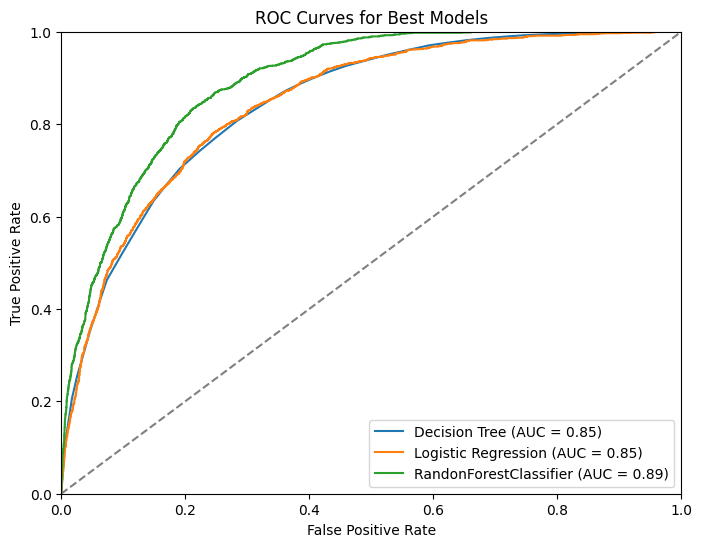

In [38]:
# Your code goes here 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Decision tree classifier
model = DecisionTreeClassifier(min_samples_leaf = 128)
# Remember to use the training data here!! 
model.fit(df[predictors], df[target])
# And to use the test data here!!
probs = model.predict_proba(df[predictors])[:, 1]
fpr_dt, tpr_dt, thresholds = roc_curve(df[target], probs)

# Logistic regression
model = LogisticRegression(C = 0.3, max_iter=1000)
model.fit(df[predictors], df[target])
# And to use the test data here!!
probs = model.predict_proba(df[predictors])[:, 1]
fpr_lr, tpr_lr, thresholds = roc_curve(df[target], probs)

# Random Forest Classifier ROC Curve
model = RandomForestClassifier(n_estimators=100, max_depth=8)
model.fit(df[predictors], df[target])
# And to use the test data here!!
probs = model.predict_proba(df[predictors])[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(df[target], probs)

# Calculate AUC values
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, label='RandonForestClassifier (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Best Models')
plt.legend(loc='lower right')
plt.show()


The goal is to find a model that minimizes the false positive rate and maximizes the true positive rate. The ROC curve should be more inclined towards the y-axis, meaning we can target more true positives while keeping false positives low by changing the threshold value.

After analyzing the ROC curves of different models, it was found that DecisionTreeClassifier is the least effective while LogisticRegression and RandomForestClassifier are almost equally effective. If the threshold is set to target around 60% of true positives, it would include only 15% of false positives.

As per the question, the false positive rate needs to be less than 5% to target 25% of the population, so the current model (RandomForestClassifier) would suffice. However, if a new model is found whose ROC curve is even more tilted towards the y-axis and can provide a false positive rate of less than 2-3% to target 25% of true positives, then the current model would be changed.

__5. What would be the potential benefit of stopping someone from leaving? HINT: Take a look at the description of the data and the retention offer.__

The potential benefit of stopping someone from leaving is the revenue the company will generate from retaining that customer for an additional year after offering the retention offer. The retention offer costs $200, but if the customer decides to extend their contract for an extra year, the company will generate additional revenue from their monthly charges during that time. This additional revenue could be significantly more than the cost of the retention offer, resulting in a net profit for the company. Additionally, retaining customers can help reduce customer acquisition costs and improve customer loyalty and satisfaction, leading to long-term benefits for the company.

__6. Split your training data into two sets, one with 90% of the data (the "sub-training" set) and another with 10% of the data (the validation set). Train the model you selected with the "sub-training" set, apply it to the validation set, and plot a profit curve by ranking customers according to their probability of churning. Make a recommendation of what people to target with the retention incentive according to this profit curve.__

In [39]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [40]:
# Your code goes here

model = best_randomforest_model

def build_cumulative_curve(model, scale=100):
    # Fit model
    model.fit(X_train_sub, y_train_sub)

    # Get the probability of Y_test records being = 1
    y_val_prob = model.predict_proba(X_val)[:, 1]

    # Sort these probabilities and the true value in descending order of probability
    order = np.argsort(y_val_prob)[::-1]
    y_val_prob_1_sorted = y_val_prob[order]
    y_val_sorted = np.array(y_val)[order]

    # Build the cumulative response curve
    x_cumulative = np.arange(len(y_val_prob_1_sorted)) + 1
    y_cumulative = np.cumsum(y_val_sorted)

    # Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale

    return x_cumulative, y_cumulative

unit_cost = 200
unit_revenue = X_train['MonthlyCharges'].mean()*12

cost_matrix = pd.DataFrame([[unit_revenue - unit_cost, - unit_cost], [0, 0]], columns=['p', 'n'], index=['Y', 'N'])
print ("Cost matrix")
print (cost_matrix)

Cost matrix
            p    n
Y  576.369173 -200
N    0.000000    0


Profit earned when targeting 25% people: 42449.594773333345
0.47307366676493245


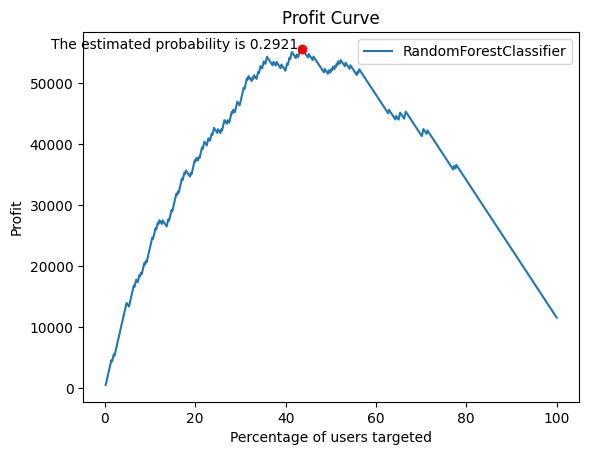

In [41]:
unit_cost = -cost_matrix['n']['Y']
unit_revenue = cost_matrix['p']['Y'] + unit_cost

def ProfitCurve(models):
    # Plot curve for each model
    total_obs = len(y_val)
    total_pos = y_val.sum()
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key], scale=1)
        
        profits = unit_revenue * y_cumulative * total_pos - unit_cost * x_cumulative * total_obs
        print('Profit earned when targeting 25% people:', profits[int(len(profits)*0.25)])
        plt.plot(x_cumulative*100, profits, label=key)
        # Find the estimated probability
        Y_test_probability = models[key].predict_proba(X_val)[:, 1]
        order = np.argsort(Y_test_probability)[::-1]
        Y_test_probability_sorted = Y_test_probability[order]
        # add the point to the plot
        plt.plot(x_cumulative[profits.argmax(axis=0)]*100,
                 profits[profits.argmax(axis=0)],
                 'ro')
        plt.text(x_cumulative[profits.argmax(axis=0)]*100,
                 profits[profits.argmax(axis=0)],"The estimated probability is %.4f." % Y_test_probability_sorted[profits.argmax(axis=0)],horizontalalignment='right')
        print(Y_test_probability_sorted[int(len(profits)*0.25)] )        

    # Plot other details
    plt.xlabel("Percentage of users targeted")
    plt.ylabel("Profit")
    plt.title("Profit Curve")
    plt.legend()

models = {'RandomForestClassifier':best_randomforest_model}

ProfitCurve(models)

As per the profit curve in the above image, we target the 25% of customers with highest probability and get \$42449.60 profit. The chosen threshold for probability is 0.473

__7. Can you think of something better than ranking according to the probability of churning? If so, tell us what it is and plot a profit curve according to this new ranking. Compare the results of the new ranking with the results you got in the previous question. Are the results any better? Would your recommendation change?__

Certainly! We can adopt a different approach by sorting customers based on the estimated revenue loss for each one, taking into account both their probability of leaving and the revenue associated with them. By doing so, we can prioritize the customers who are expected to cause the most significant revenue loss.

To determine the anticipated revenue loss for each customer, we need to calculate the expected revenue generated by each customer, taking into account their monthly expenses and the projected probability of churn. We can then calculate the predicted revenue loss for each customer by multiplying their chance of churn, monthly fees, and the cost of the retention offer. Afterward, we can rank the customers based on their expected revenue loss and target the top 25% of customers.

In [42]:

def build_cumulative_curve2(model, scale=100):
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
    # Fit model
    model.fit(X_train_sub, y_train_sub)

    # Get the probability of Y_test records being = 1
    y_val_prob = model.predict_proba(X_val)[:, 1]

    # Calculate predicted revenue for each customer
    predicted_revenue = X_val['MonthlyCharges'] * 12 * (1 - y_val_prob)

    # Calculate predicted loss of revenue for each customer, assuming a retention offer cost of $200
    predicted_loss = predicted_revenue * y_val_prob * 200

    # Calculate profit for each customer
    profit = predicted_revenue - predicted_loss

    # Sort customers by descending predicted profit
    X_val['profit'] = profit
    X_val = X_val.sort_values(by='profit', ascending=False)
    order = np.argsort(X_val['profit'])[::-1]
    y_val_prob_1_sorted = y_val_prob[order]
    y_val_sorted = np.array(y_val)[order]


    # Build the cumulative response curve
    x_cumulative = np.arange(len(y_val_prob_1_sorted)) + 1
    y_cumulative = np.cumsum(y_val_sorted)

    # Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale

    return x_cumulative, y_cumulative

unit_cost = 200
unit_revenue = X_train['MonthlyCharges'].mean()*12

cost_matrix = pd.DataFrame([[unit_revenue - unit_cost, - unit_cost], [0, 0]], columns=['p', 'n'], index=['Y', 'N'])
print ("Cost matrix")
print (cost_matrix)

Cost matrix
            p    n
Y  576.369173 -200
N    0.000000    0


The profit earned at targeting 25% perople: -2579.817280000003


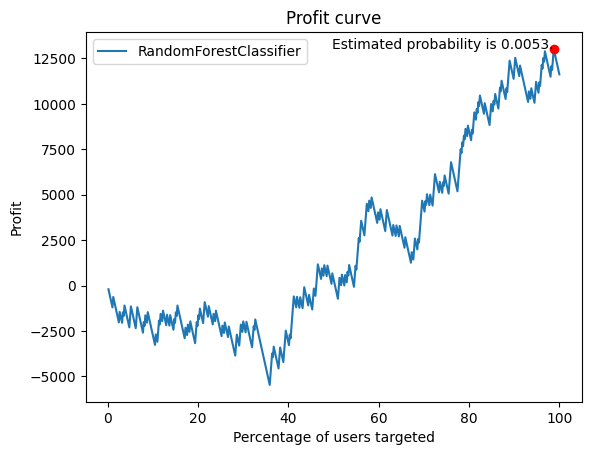

In [43]:
unit_cost = -cost_matrix['n']['Y']
unit_revenue = cost_matrix['p']['Y'] + unit_cost

def ProfitCurve2(models):
    # Plot curve for each model
    total_obs = len(y_val)
    total_pos = y_val.sum()
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve2(models[key], scale=1)
        
        profits = unit_revenue * y_cumulative * total_pos - unit_cost * x_cumulative * total_obs
        print('The profit earned at targeting 25% perople:', profits[int(len(profits)*0.25)])
        plt.plot(x_cumulative*100, profits, label=key)

        # Find the estimated probability
        Y_test_probability_1 = models[key].predict_proba(X_val)[:, 1]
        order = np.argsort(Y_test_probability_1)[::-1]
        Y_test_probability_1_sorted = Y_test_probability_1[order]
        # add the point to the plot
        plt.plot(x_cumulative[profits.argmax(axis=0)]*100,
                 profits[profits.argmax(axis=0)],
                 'ro')
        plt.text(x_cumulative[profits.argmax(axis=0)]*100,
                 profits[profits.argmax(axis=0)],"Estimated probability is %.4f." % Y_test_probability_1_sorted[profits.argmax(axis=0)],horizontalalignment='right')

    # Plot other details
    plt.xlabel("Percentage of users targeted")
    plt.ylabel("Profit")
    plt.title("Profit curve")
    plt.legend()

models = {'RandomForestClassifier':best_randomforest_model}

ProfitCurve2(models)

The above graph shows that the previous metric which is based on probability is better to use. The above graph shows a loss of \$2579.81 for targeting 25% users.

__8. Now the you have chosen a model and a threshold, it is time to evaluate the potential impact of your solution. Use the entire training data to train the model you selected, and then use the model on the test data to decide which customers to target with a retention offer. How much money do you estimate that your recommendation would have saved if we had given the retention offer to the customers in the test data?__

In [44]:
# Your code goes here

from sklearn.metrics import confusion_matrix

# Train the model using the entire training dataset
best_randomforest_model.fit(X_train, y_train)

# Predict churn probabilities for the test dataset
probs = best_randomforest_model.predict_proba(X_test)[:, 1]

y_pred = probs>0.4715

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", cm)

profit = np.sum((cm * cost_matrix).values)
print("Profit:", profit)

savings = np.sum((cm * cost_matrix).values)
print("Amount oif savings if this recommendation is adopted by extending the retention offer to 25% users would be $", savings)

Confusion Matrix [[923 110]
 [188 186]]
Profit: 509988.7469866667
Amount oif savings if this recommendation is adopted by extending the retention offer to 25% users would be $ 509988.7469866667
